In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# English Premier League 2020/2021 player stats

In [2]:
mainpath = "/home/nicolasterroni/projects/cursos/data-analysis-and-machine-learning/datasets/Premier_League/"
data = pd.read_csv(mainpath+"EPL_20_21.csv")

In [29]:
data['Passes_Completed'] = data['Passes_Attempted'] * data['Perc_Passes_Completed']/100
data['Passes_Completed'] = data['Passes_Completed'].astype(int)

data['Passes_Completed_Per_Minute'] = round(data['Passes_Completed'] / data["Mins"],2)
data['Passes_Completed_Per_Minute'] = data['Passes_Completed_Per_Minute'].astype(float)

data['Passes_Attempted_Per_Minute'] = round(data['Passes_Attempted'] / data["Mins"],2)
data['Passes_Attempted_Per_Minute'] = data['Passes_Attempted_Per_Minute'].astype(float)

columns = data.columns.values.tolist()

# Get all teams
clubs = [club for club, group_data in data.groupby("Club")]

positions = []
for index, row in data.iterrows():
    try:
        position_list = row["Position"].split(",")
    except:
        position_list = [row,]
    for position in position_list:
        positions.append(position)
positions = list(set(positions))

data.dtypes

Name                            object
Club                            object
Nationality                     object
Position                        object
Age                              int64
Matches                          int64
Starts                           int64
Mins                             int64
Goals                            int64
Assists                          int64
Passes_Attempted                 int64
Perc_Passes_Completed          float64
Penalty_Goals                    int64
Penalty_Attempted                int64
xG                             float64
xA                             float64
Yellow_Cards                     int64
Red_Cards                        int64
Passes_Completed                 int64
Passes_Completed_Per_Minute    float64
Passes_Attempted_Per_Minute    float64
dtype: object

In [4]:
data.shape

(532, 20)

In [30]:
data.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Passes_Completed,Passes_Completed_Per_Minute,Passes_Attempted_Per_Minute
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226,576.815789,0.396786,0.503402
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268,530.031279,0.208027,0.264234
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,140.250000,0.250000,0.340000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000,442.500000,0.350000,0.450000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000,889.250000,0.520000,0.630000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000,2567.000000,2.000000,4.000000


In [6]:
clubs

['Arsenal',
 'Aston Villa',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Leeds United',
 'Leicester City',
 'Liverpool FC',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Sheffield United',
 'Southampton',
 'Tottenham Hotspur',
 'West Bromwich Albion',
 'West Ham United',
 'Wolverhampton Wanderers']

### Bar charts for the average of completed passes for MFs, goals for FWs, and less completed pasess and red cars for DFs of each team 

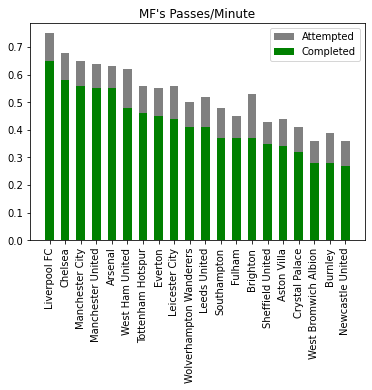

In [59]:
tuples_list = []
    
mfs_data = data[data["Position"].str.contains("MF")]
mfs_data_groued_by_club = mfs_data.groupby("Club")

for club in clubs:
    club_mfs_data = mfs_data_groued_by_club.get_group(club)
    completed_passes_avg = club_mfs_data["Passes_Completed_Per_Minute"].mean()
    attemtped_passes_avg = club_mfs_data["Passes_Attempted_Per_Minute"].mean()
    tpl = [club, round(completed_passes_avg,2), round(attemtped_passes_avg,2)]
    tpl = tuple(tpl)
    tuples_list.append(tpl)
    
tuples_list.sort(key = lambda x: x[1])
tuples_list.reverse()


x_values = [tpl[0] for tpl in tuples_list]
completed_values = [tpl[1] for tpl in tuples_list]
attemtped_values = [tpl[2] for tpl in tuples_list]

fig = plt.figure()
ax = fig.add_subplot()

ax.bar(x=x_values, height=attemped_values, width=0.55,align='center', label="Attempted", color="gray")
ax.bar(x=x_values, height=completed_values, width=0.55,  align='center',label="Completed", color="g")


plt.xticks(x_values, x_values, rotation="vertical")
plt.title("MF's Passes/Minute")
plt.legend()
plt.show()

In [50]:
tuples_list

[('Liverpool FC', 0.65, 0.75),
 ('Chelsea', 0.58, 0.68),
 ('Manchester City', 0.56, 0.65),
 ('Manchester United', 0.55, 0.64),
 ('Arsenal', 0.55, 0.63),
 ('West Ham United', 0.48, 0.62),
 ('Tottenham Hotspur', 0.46, 0.56),
 ('Everton', 0.45, 0.55),
 ('Leicester City', 0.44, 0.56),
 ('Wolverhampton Wanderers', 0.41, 0.5),
 ('Leeds United', 0.41, 0.52),
 ('Southampton', 0.37, 0.48),
 ('Fulham', 0.37, 0.45),
 ('Brighton', 0.37, 0.53),
 ('Sheffield United', 0.35, 0.43),
 ('Aston Villa', 0.34, 0.44),
 ('Crystal Palace', 0.32, 0.41),
 ('West Bromwich Albion', 0.28, 0.36),
 ('Burnley', 0.28, 0.39),
 ('Newcastle United', 0.27, 0.36)]

In [9]:
mfs_data_groued_by_club.get_group("Liverpool FC")

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Passes_Completed,Passes_Completed_Per_Minute
83,Georginio Wijnaldum,Liverpool FC,NED,MF,29,38,34,2941,2,0,1747,93.3,0,0,0.10,0.05,1,0,1629,0.55
87,Fabinho,Liverpool FC,BRA,"DF,MF",26,30,28,2567,0,0,2049,91.1,0,0,0.02,0.01,6,0,1866,0.73
88,Thiago Alcántara,Liverpool FC,ESP,MF,29,24,20,1854,1,0,1674,89.5,0,0,0.07,0.11,4,0,1498,0.81
89,Jordan Henderson,Liverpool FC,ENG,"MF,DF",30,21,20,1704,1,1,1812,86.8,0,0,0.09,0.07,0,0,1572,0.92
91,Curtis Jones,Liverpool FC,ENG,MF,19,24,13,1179,1,2,976,91.2,0,0,0.11,0.12,2,0,890,0.75
93,James Milner,Liverpool FC,ENG,"MF,DF",34,26,11,1070,0,1,913,84.9,0,0,0.04,0.10,3,0,775,0.72
97,Naby Keïta,Liverpool FC,GUI,MF,25,10,7,520,0,0,356,87.4,0,0,0.09,0.14,1,0,311,0.60
99,Xherdan Shaqiri,Liverpool FC,SUI,"MF,FW",28,14,5,556,0,2,426,83.6,0,0,0.06,0.49,2,0,356,0.64
103,Takumi Minamino,Liverpool FC,JPN,"MF,FW",25,9,2,293,1,0,139,79.9,0,0,0.20,0.00,0,0,111,0.38
104,Alex Oxlade-Chamberlain,Liverpool FC,ENG,"FW,MF",26,13,2,253,1,1,138,75.4,0,0,0.13,0.08,0,0,104,0.41


### Get top players of each cathegory and each position

### Create Julian Alvarez in the dataset using numpy in reasonable ranges of values to each column for FWs

### Set 3 team needs and find incorporatios that they could do

### Find replacement for a valued player